In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [358]:
demos_df = pd.read_csv('airline_passenger_satisfaction.csv')
pd.set_option('display.max_columns', None)
demos_df.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [359]:
demos_df.drop(columns=['ID'],
              inplace=True)  # inplace=True means that the changes will be applied to the DataFrame df itself, and it will be modified without creating a copy
demos_df.head(3)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied


In [360]:
demos_df.shape

(129880, 23)

## Analyzing DataFrame with Passenger Satisfaction Data

In [361]:
demos_df.describe()
# First Quartile (25%)
# The first quartile (Q1) is the point below which 25% of the data lies.
# To find it, we divide the entire list into 4 parts.
# for instance, we have 13 elem: [18, 19, 20, 24, 25, 31, 35, 38, 40, 41, 45, 50, 52]
# 25% of 13 numbers → This is approximately 3 numbers.
# So the first 3 numbers (18, 19, 20) are the first 25% of the data.
# The next number (24) separates them from the rest, so Q1 = 24.
# Median (50%)
# The median is the middle of the list, the number that divides the data in half.
# Since we have 13 numbers, the middle (7th in a row) is 35.
# Median (Q2) = 35
# Third Quartile (75%)
# The third quartile (Q3) is the point below which 75% of the data lies.
# 75% of 13 numbers → That's about 9 numbers.
# So, the first 9 numbers (18 to 40) make up 75% of the data, and the next number 41 separates them from the rest.
# Third Quartile (Q3) = 41

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [362]:
demos_df.dtypes

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


In [363]:
demos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [364]:
demos_df.values

array([['Male', 48, 'First-time', ..., 5, 5, 'Neutral or Dissatisfied'],
       ['Female', 35, 'Returning', ..., 5, 5, 'Satisfied'],
       ['Male', 41, 'Returning', ..., 3, 3, 'Satisfied'],
       ...,
       ['Male', 42, 'Returning', ..., 3, 5, 'Neutral or Dissatisfied'],
       ['Male', 50, 'Returning', ..., 3, 5, 'Satisfied'],
       ['Female', 20, 'Returning', ..., 2, 1, 'Neutral or Dissatisfied']],
      shape=(129880, 23), dtype=object)

In [365]:
demos_df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [366]:
demos_df['Arrival Delay']

0          5.0
1         39.0
2          0.0
3          0.0
4          1.0
          ... 
129875     3.0
129876     0.0
129877    14.0
129878    22.0
129879     0.0
Name: Arrival Delay, Length: 129880, dtype: float64

In [367]:
demos_df['Arrival Delay'].mean

<bound method Series.mean of 0          5.0
1         39.0
2          0.0
3          0.0
4          1.0
          ... 
129875     3.0
129876     0.0
129877    14.0
129878    22.0
129879     0.0
Name: Arrival Delay, Length: 129880, dtype: float64>

In [368]:
demos_df['Arrival Delay'].fillna(demos_df['Arrival Delay'].mean(), inplace=True)

In [369]:
demos_df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

## Creating Diagrams for Passenger Data Analysis

In [370]:
demos_df['Satisfaction'].value_counts()

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

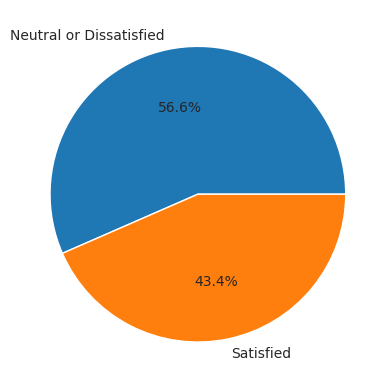

In [371]:
plt.pie(demos_df['Satisfaction'].value_counts(), labels=['Neutral or Dissatisfied', 'Satisfied'],
        autopct='%1.1f%%')  # Why does the first value correspond to "Neutral of Dissatisfied"? from largest to smallest
plt.show()

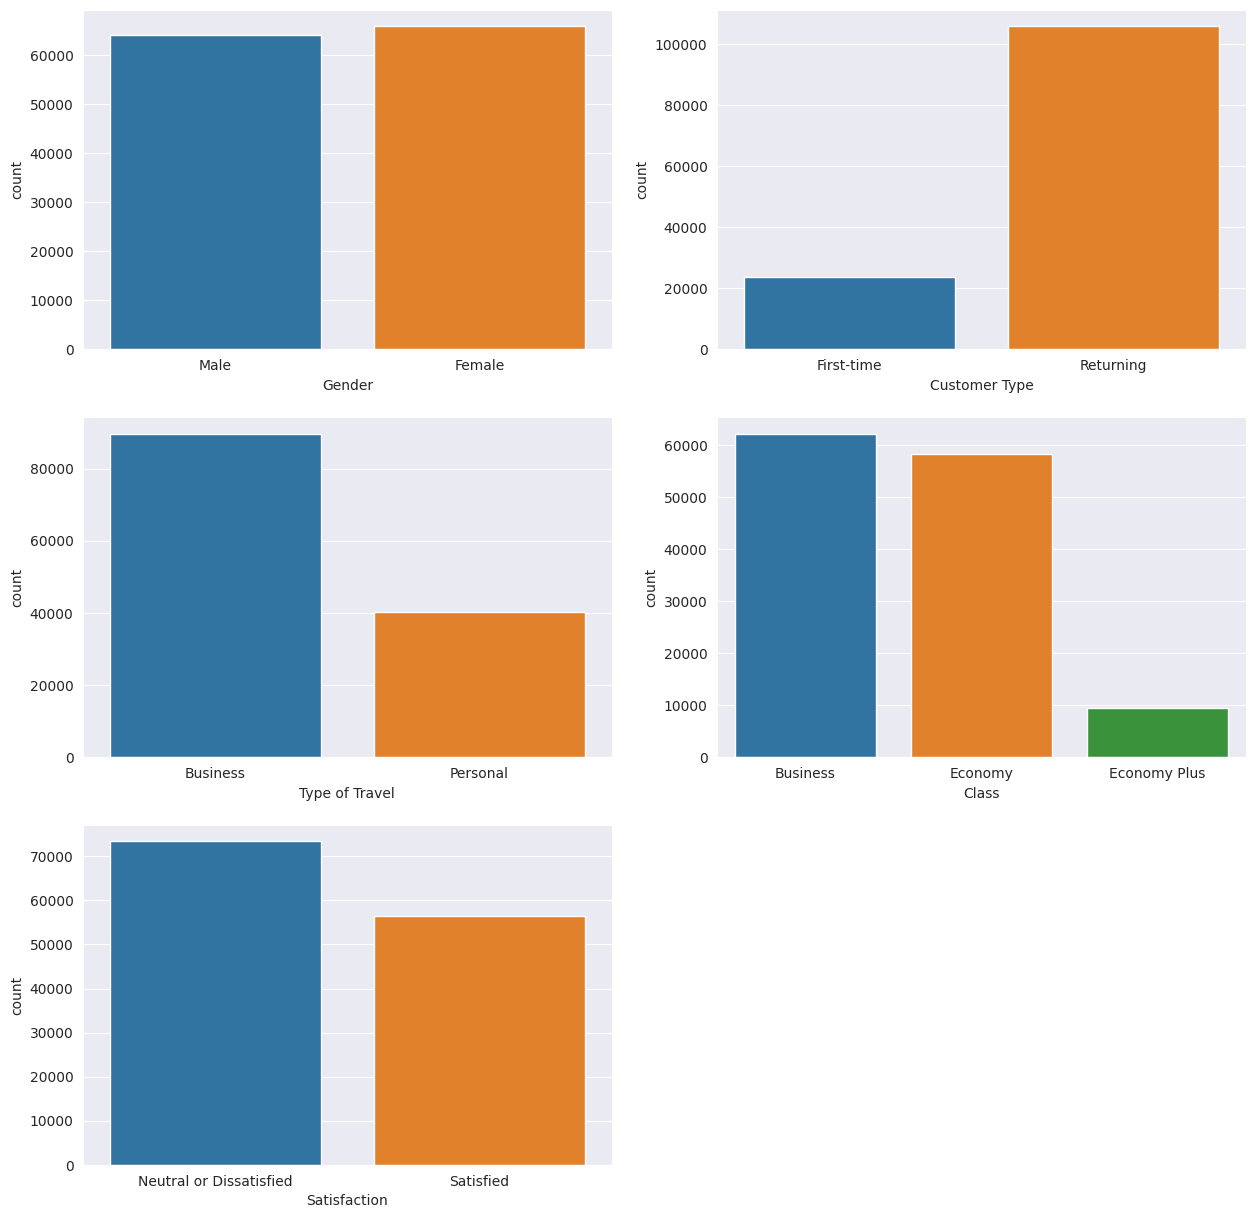

In [372]:
columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
plt.figure(figsize=(15,
                    15))  # figsize=(15,15) — means that the width and height of the graph will be 15 inches. The higher the numbers, the larger the graph.
for i, column in enumerate(columns):  # i is the index, column is the column name
    plt.subplot(3, 2, i + 1)  #  3x2 grid (3 rows, 2 columns)
    # If i = 0, then plt.subplot(3, 2, 0 + 1) = plt.subplot(3, 2, 1) → First graph.
    # If i = 1, then plt.subplot(3, 2, 2) → Second graph.
    # If i = 2, then plt.subplot(3, 2, 3) → Third graph.
    # Without +1, plt.subplot() would get 0, and there is no such number!
    sns.countplot(x=column, data=demos_df, hue=demos_df[
        column])  # sns.countplot() counts how many times each value occurs in the column and plots the columns.
    # hue are the categories that will color the columns to show what transport is preferred by different gender groups.
plt.show()

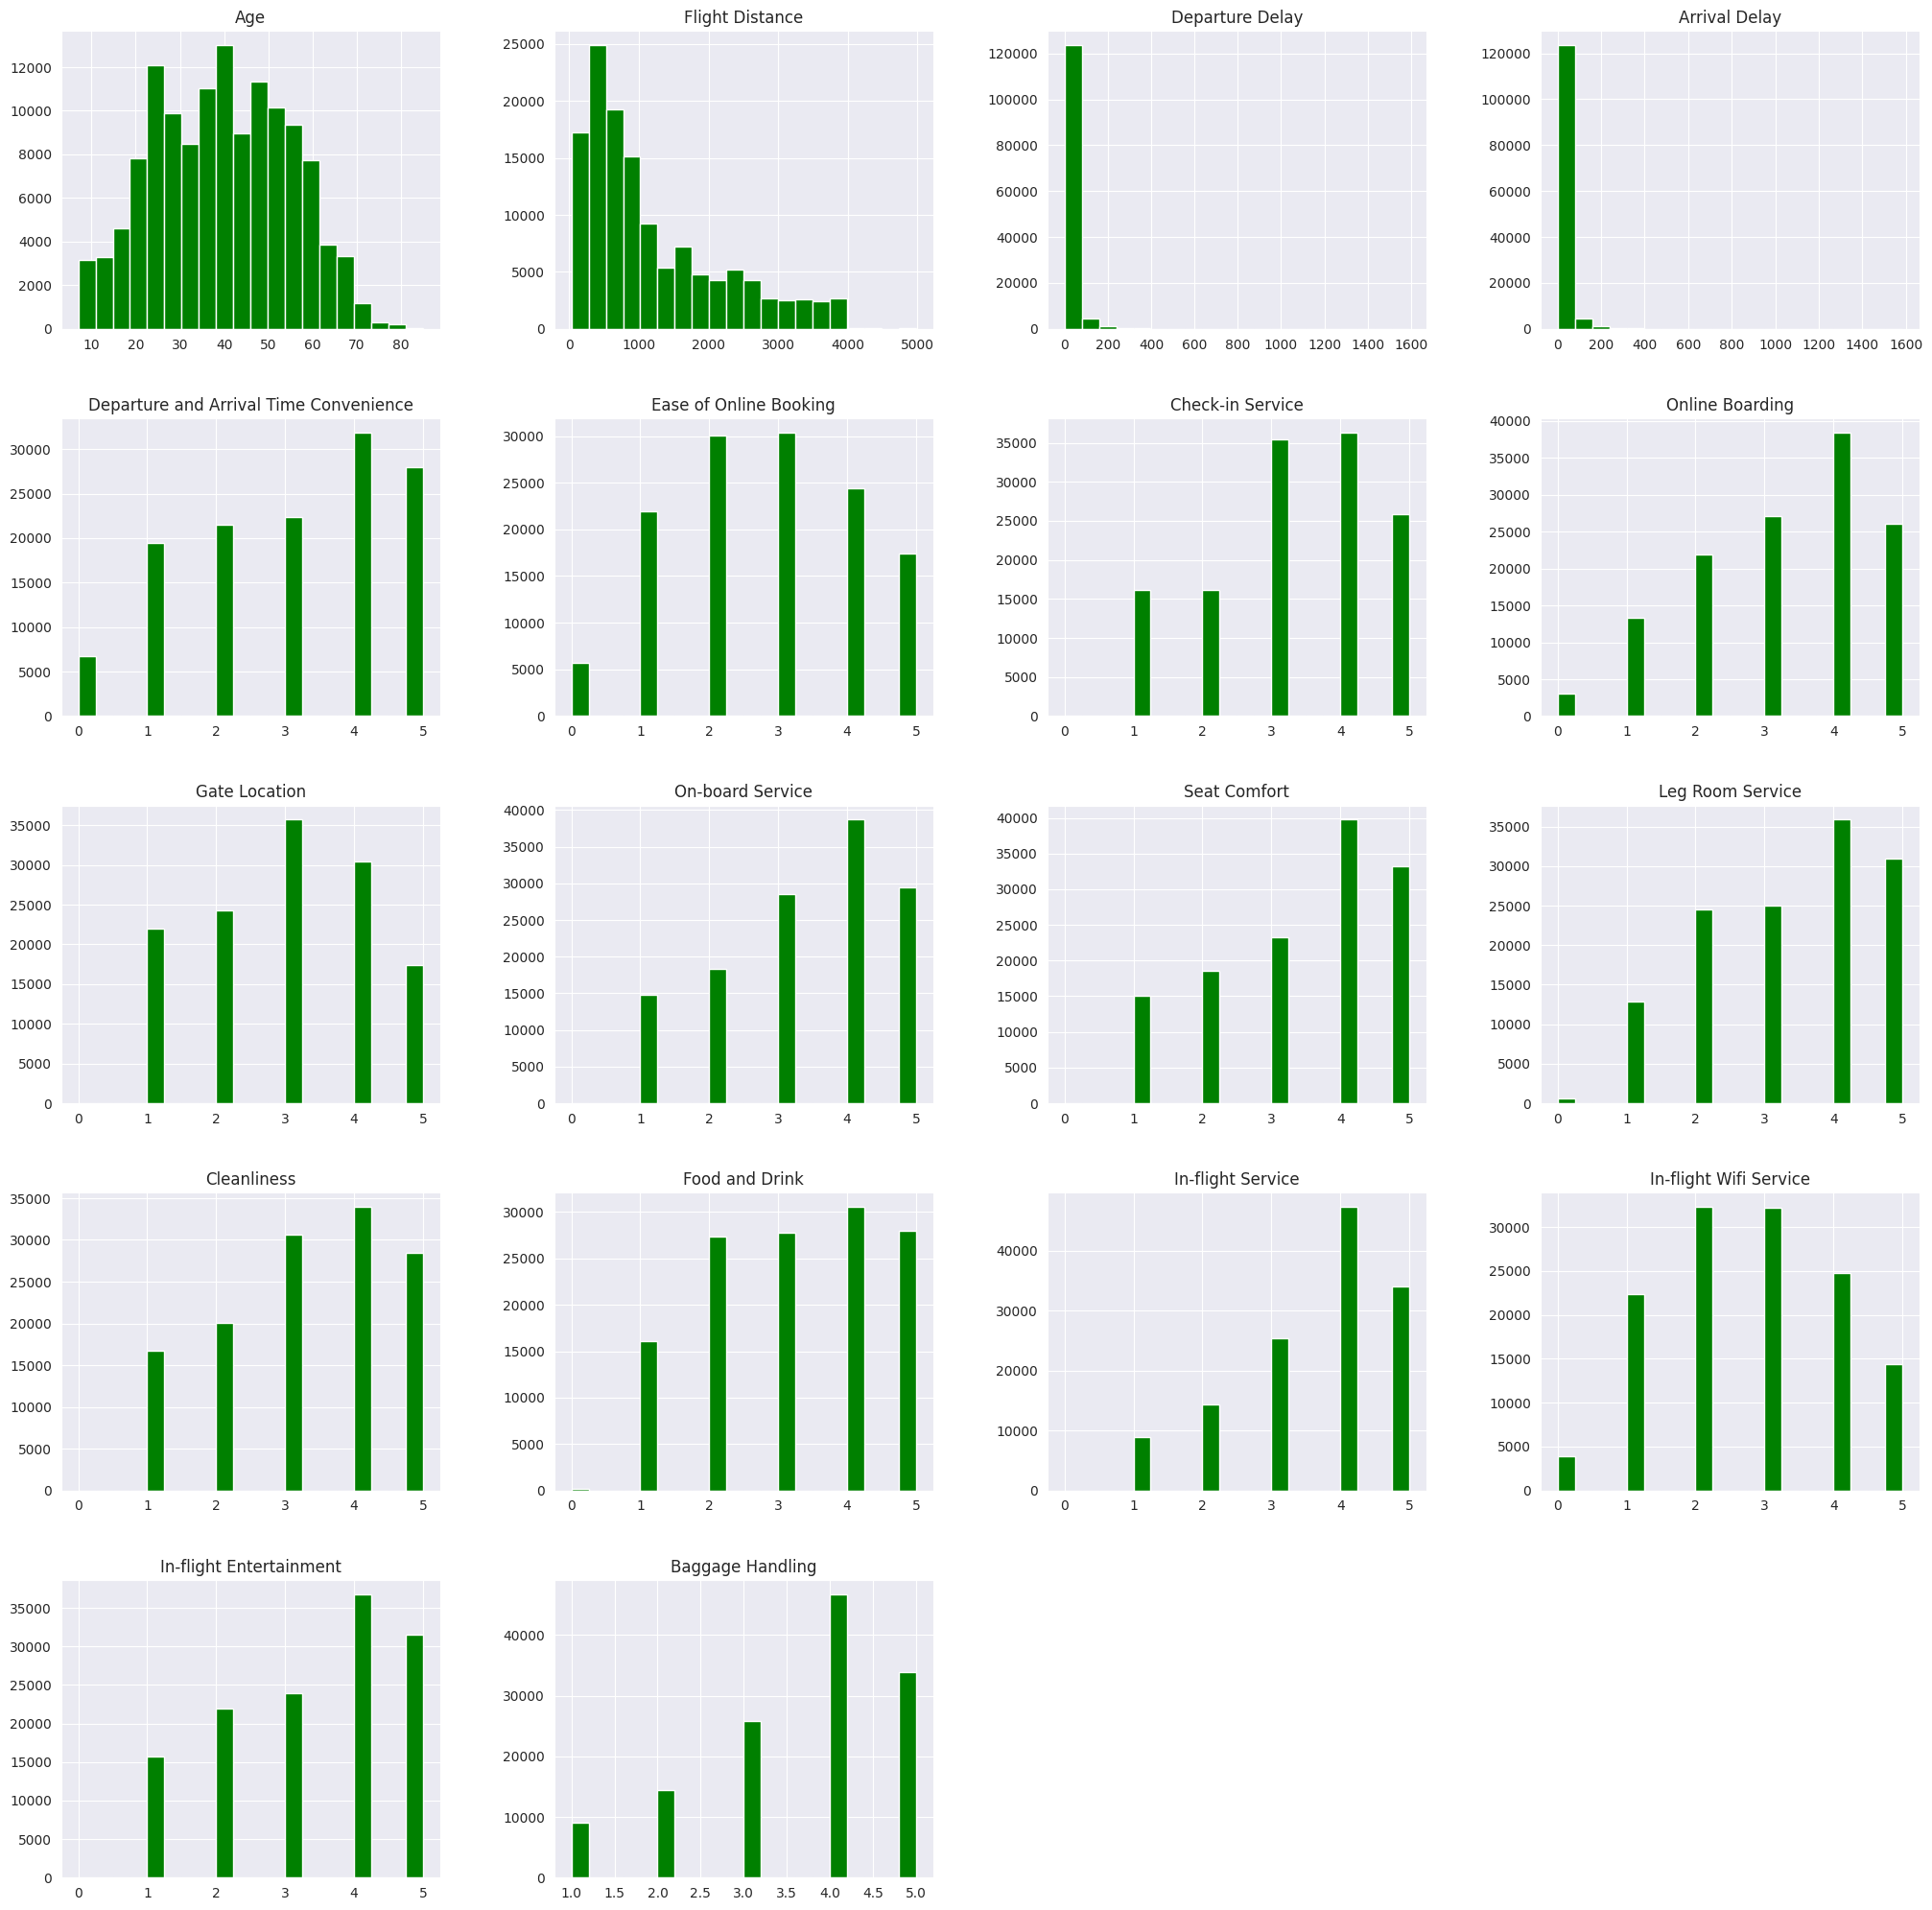

In [373]:
demos_df.hist(bins=20, figsize=(25, 25),
              color='green')  # bins=20 → Splits the data into 20 intervals (the more bins, the more detailed the graph).
plt.show()

## Manually Encoding Non-Numeric Values in DataFrame

In [374]:
demos_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [375]:
demos_df['Satisfaction'].unique()  # we needn't coding it, because it's target

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [376]:
demos_df.select_dtypes(
    include=object).columns  # finds all categorical (text) columns in a DataFrame, to help you figure out which columns need to be encoded

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')

In [377]:
demos_df['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [378]:
# df.replace({
#     'Gender': {
#         'Male': 1,
#         'Female': 2
#     },
#     'Customer Type': {
#         'First-time': 1,
#         'Returning': 2
#     },
#     'Type of Travel': {
#         'Business': 1,
#         'Personal': 2
#     }, 'Class': {
#         'Business': 1,
#         'Economy': 2,
#         'Economy Plus': 3
#     }
# }, inplace=True)
# df.head(5)

## Encoding Non-Numeric Values Using LabelEncoder

In [379]:
label_encoder = preprocessing.LabelEncoder()
object_columns = demos_df.select_dtypes(include=['object']).drop(columns=['Satisfaction']).columns
for column in object_columns:
    demos_df[column] = label_encoder.fit_transform(demos_df[column])
demos_df.head(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,1,50,1,0,0,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,0,49,1,0,0,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


## Creating Additional Diagrams After Data Cleaning and Encoding

<Axes: >

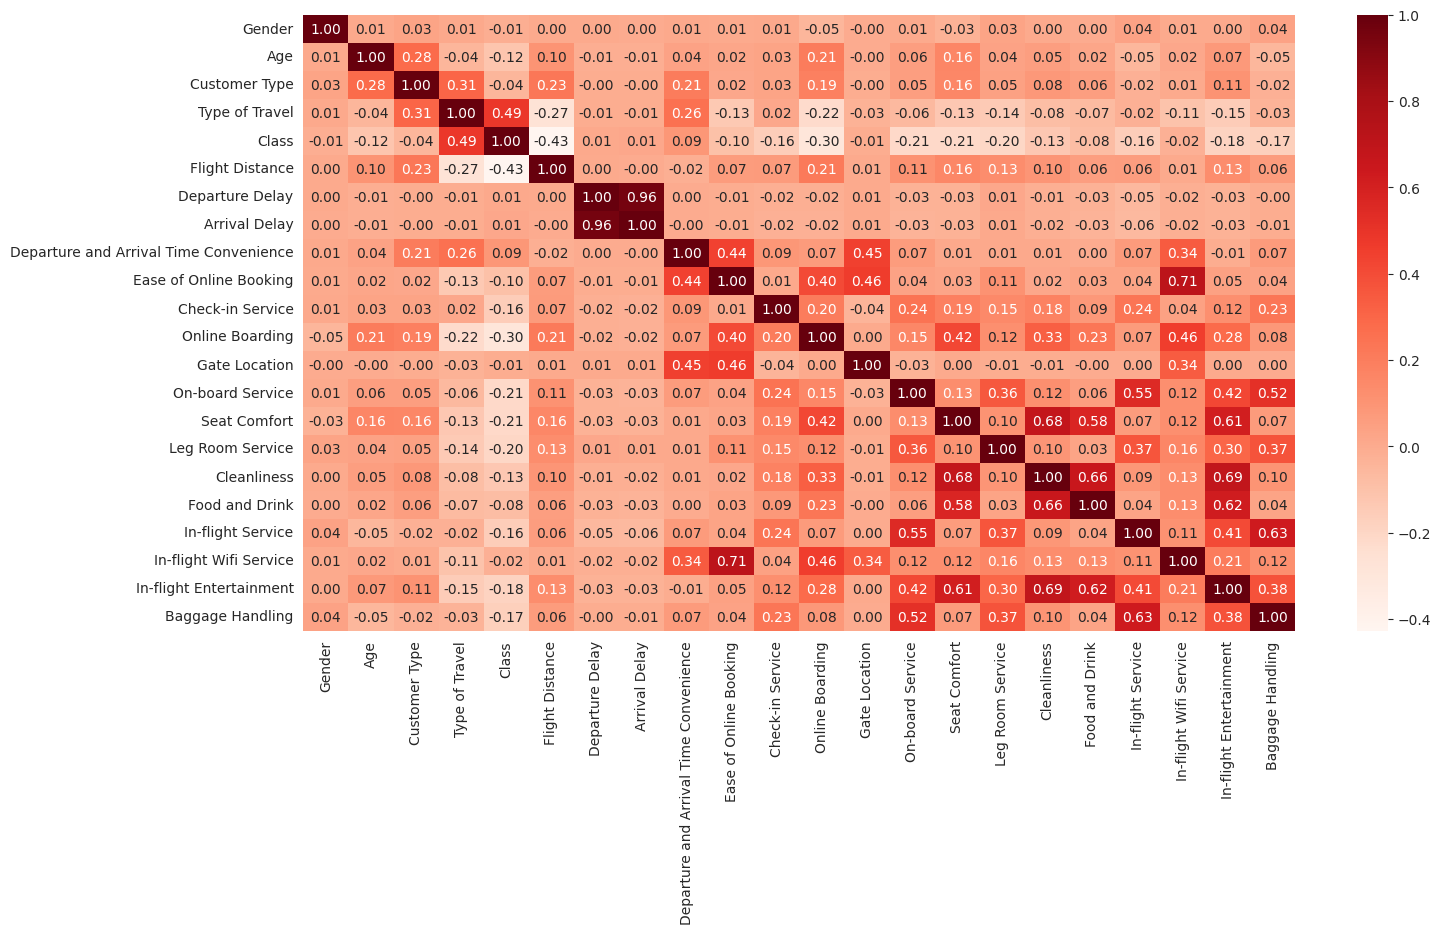

In [380]:
plt.figure(figsize=(16,8))
sns.heatmap(demos_df.drop(columns=['Satisfaction']).corr(), annot=True, fmt='.2f', cmap="Reds")
# .corr() → calculates the correlation (how related the columns are).
# Returns a table where the values are from -1 to 1:
# 1 → strong positive relationship (they grow together).
# -1 → strong negative relationship (one grows, the other falls).
# 0 → no relationship.
# annot=True → labels the numbers on the heat map so that the exact correlation values are visible.

<Axes: >

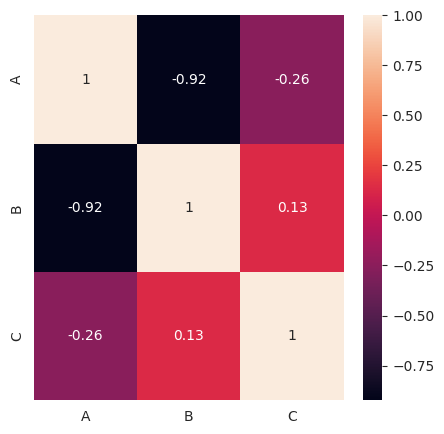

In [381]:
# describe df.corr()
demos_df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [4, 3, 2, 1],
    'C': [1, 2, 1, 1]
})

plt.figure(figsize=(5,5))
sns.heatmap(demos_df.corr(), annot=True)